In [10]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("quora-question-pairs/train.csv")

In [11]:
df.shape

(404290, 6)

In [12]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate
158016,158016,246932,246933,What is it like to ask to have your name remov...,Should I officially resign from the Mormon chu...,0
273420,273420,220408,391873,What are rules Muslims have to follow and what...,Is it mandatory to follow the rules which aren...,0
121745,121745,197224,112423,How do I prepare for IBPS PO exam in 2 months?,How do I crack the IBPS PO exam?,0
355349,355349,484573,484574,Why does America of late always elect draft do...,i have 3 credit cards one of which has no apr ...,0
354188,354188,217282,345478,What is the best birthday wish ever?,What is the best birthday wishes?,1
180611,180611,19487,8067,How can I increase traffic to my site and what...,How can I increase the traffic on my website? ...,1
45162,45162,66054,35980,What is difference between variance and standa...,How are variance and standard deviation semant...,1
295689,295689,77028,184978,How many apple seeds do you have to consume to...,Is eating apple seeds bad for you?,0
115510,115510,188344,188345,What is context management?,What has no context?,0
137167,137167,218666,218667,What is best app locker app for free?,Can the police arrest based on a false complai...,0


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [14]:
#Missing values

df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [15]:
df.duplicated().sum()

0

In [16]:
#distribustion of duplicate data

print(df['is_duplicate'].value_counts())

0    255027
1    149263
Name: is_duplicate, dtype: int64


In [19]:
print((df['is_duplicate'].value_counts()/df['is_duplicate'].count())*100)

0    63.080215
1    36.919785
Name: is_duplicate, dtype: float64


<AxesSubplot:>

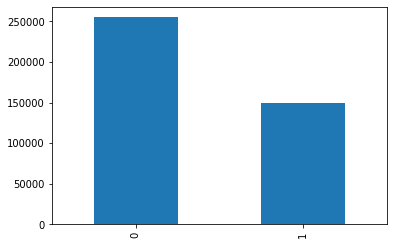

In [20]:
df['is_duplicate'].value_counts().plot(kind='bar')

In [22]:
#Repeated Data

qid = pd.Series(df['qid1'].tolist() + df['qid2'].tolist())

In [25]:
print("Number of unique questions =", np.unique(qid).shape[0])

Number of unique questions = 537933


In [28]:
x = qid.value_counts()>1

In [29]:
x

2559       True
30782      True
4044       True
2561       True
14376      True
          ...  
75109     False
81254     False
85352     False
83305     False
168274    False
Length: 537933, dtype: bool

In [30]:
print("Number of questions getting repeated",x[x].shape[0])

Number of questions getting repeated 111780


In [33]:
qid.shape

(808580,)

In [34]:
len(df['qid1'])

404290

In [35]:
len(df['qid2'])

404290

In [36]:
len(qid)

808580

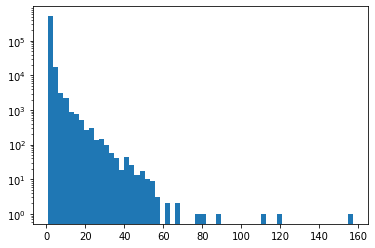

In [41]:
plt.hist(qid.value_counts().values,bins=60)
plt.yscale('log')
plt.show()